<a href="https://colab.research.google.com/github/rickvig/dojo-analise-dados/blob/main/DOJO_EDA_Parte_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
arquivo = 'fato_pedido_202103250922.csv'
df = pd.read_csv(arquivo, dtype={'chave': str})

In [4]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.head(5)

,chave,numero_pedido,numero_pedido_aux1,numero_pedido_aux2,data_emissao,data_entrega,sequencia_item,situacao,quant_pedida,quant_faturada,quant_cancelada,quant_aberta,preco_unitario,valor_bruto,valor_desconto1,valor_desconto2,valor_liquido,valor_ipi,valor_imcs_substituicao_tributaria,valor_frete,percentual_comissao_vendedor1,percentual_comissao_vendedor2,media_desconto,bloqueado,observacao_pedido,numero_lote_pedido,status_lote_pedido_comercial,data_liberacao_comercial,status_lote_pedido_separacao,data_recebimento_separacao,canal_entrada_pedido,id_dim_produto,produto_versao,produto_chave,produto_familia,produto_grupo,produto_sub_grupo,produto_produto,produto_data_lancamento,produto_situacao,produto_descricao,produto_derivacao,produto_complemento,produto_modelo,produto_importado,produto_origem,produto_roteiro,produto_unidade_medida,produto_custo_medio,produto_preco_ultima_entrada,produto_fora_de_linha,produto_marca,id_dim_cliente,cliente_versao,cliente_data_inicial,cliente_data_final,cliente_chave,cliente_codigo,cliente_nome_razao_social,cliente_fantasia,cliente_data_cadastro,cliente_endereco,cliente_numero,cliente_complemento,cliente_bairro,cliente_cep,cliente_situacao,cliente_cpf_cnpj,cliente_rg_inscricao_estadual,cliente_inscricao_municipal,cliente_tipo_cliente,cliente_telefone1,cliente_email,cliente_telefone2,cliente_ciclo_compra_dias,cliente_classificacao_cliente,cliente_ramo_atividade
0,212002,60630,4035939,N/I,2020-09-10,2020-09-10,7,ABERTO,300.0,0.0,0.0,300.0,6.2,2391.0,531.0,0.0,1860.0,93.0,0.0,0.0,0.1,0.0,0.0,SIM,N/I,0.0,N/I,1900-01-01,AGUARDANDO,1900-01-01,REPRESENTANTE,199.0,1.0,8164.0,FAMILIA PRODUTO 8164,GRUPO 3,SUB_GRUPO 17,NPB15PCT100CLS,2018-09-14,ATIVO,PRODUTO 8164,DERIVACAO 8164,7898632211610,N/I,N/I,ACABADO,N/I,PCT,0.0,0.0,N/I,MARCA 8164,1419.0,1.0,1900-01-01 00:00:00,2199-12-31 23:59:59,2098.0,2098.0,CLIENTE 2098,NOME DO CLIENTE Nº 2098,2018-08-31,ENDEREÇO DO CLIENTE Nº 2098,140,N/I,PARQUE INDUSTRIAL III,86706695.0,ATIVO,2098000.0,209800.0,N/I,PESSOA JURÍDICA,(48) 2106-8800,CLIENTE2098@example.com,N/I,30.0,BOM,DISTRIBUIDORA
1,212001,60630,4035939,N/I,2020-09-10,2020-09-10,6,ABERTO,300.0,0.0,0.0,300.0,6.2,2391.0,531.0,0.0,1860.0,93.0,0.0,0.0,0.1,0.0,0.0,SIM,N/I,0.0,N/I,1900-01-01,AGUARDANDO,1900-01-01,REPRESENTANTE,211.0,1.0,8178.0,FAMILIA PRODUTO 8178,GRUPO 3,SUB_GRUPO 17,NPB1PCT100CLS,2018-09-14,ATIVO,PRODUTO 8178,DERIVACAO 8178,7898632211627,N/I,N/I,ACABADO,N/I,PCT,0.0,0.0,N/I,MARCA 8178,1419.0,1.0,1900-01-01 00:00:00,2199-12-31 23:59:59,2098.0,2098.0,CLIENTE 2098,NOME DO CLIENTE Nº 2098,2018-08-31,ENDEREÇO DO CLIENTE Nº 2098,140,N/I,PARQUE INDUSTRIAL III,86706695.0,ATIVO,2098000.0,209800.0,N/I,PESSOA JURÍDICA,(48) 2106-8800,CLIENTE2098@example.com,N/I,30.0,BOM,DISTRIBUIDORA
2,212000,60630,4035939,N/I,2020-09-10,2020-09-10,5,ABERTO,150.0,0.0,0.0,150.0,6.2,1195.5,265.5,0.0,930.0,46.5,0.0,0.0,0.1,0.0,0.0,SIM,N/I,0.0,N/I,1900-01-01,AGUARDANDO,1900-01-01,REPRESENTANTE,235.0,1.0,8205.0,FAMILIA PRODUTO 8205,GRUPO 3,SUB_GRUPO 16,NVP3PCT100,2018-09-14,ATIVO,PRODUTO 8205,DERIVACAO 8205,7898945165884,N/I,N/I,ACABADO,N/I,PCT,0.0,0.0,N/I,MARCA 8205,1419.0,1.0,1900-01-01 00:00:00,2199-12-31 23:59:59,2098.0,2098.0,CLIENTE 2098,NOME DO CLIENTE Nº 2098,2018-08-31,ENDEREÇO DO CLIENTE Nº 2098,140,N/I,PARQUE INDUSTRIAL III,86706695.0,ATIVO,2098000.0,209800.0,N/I,PESSOA JURÍDICA,(48) 2106-8800,CLIENTE2098@example.com,N/I,30.0,BOM,DISTRIBUIDORA
3,211999,60630,4035939,N/I,2020-09-10,2020-09-10,4,ABERTO,300.0,0.0,0.0,300.0,6.2,2391.0,531.0,0.0,1860.0,93.0,0.0,0.0,0.1,0.0,0.0,SIM,N/I,0.0,N/I,1900-01-01,AGUARDANDO,1900-01-01,REPRESENTANTE,221.0,1.0,8189.0,FAMILIA PRODUTO 8189,GRUPO 3,SUB_GRUPO 16,NPB2PCT100,2018-09-14,ATIVO,PRODUTO 8189,DERIVACAO 8189,7898945165433,N/I,N/I,ACABADO,N/I,PCT,0.0,0.0,N/I,MARCA 8189,1419.0,1.0,1900-01-01 00:00:00,2199-12-31 23:59:59,2098.0,2098.0,CLIENTE 2098,NOME DO CLIENTE Nº 2098,2018-08-31,ENDEREÇO DO CLIENTE Nº 2098,140,N/I,PARQUE INDUSTRIAL III,86706695.0,ATIVO,2098000.0,209800.0,N/I,PESSOA JURÍDI

## Cada registro é um item de pedido

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51040 entries, 0 to 51039
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   chave                               51040 non-null  object 
 1   numero_pedido                       51040 non-null  int64  
 2   numero_pedido_aux1                  51040 non-null  object 
 3   numero_pedido_aux2                  51040 non-null  object 
 4   data_emissao                        51040 non-null  object 
 5   data_entrega                        51040 non-null  object 
 6   sequencia_item                      51040 non-null  int64  
 7   situacao                            51040 non-null  object 
 8   quant_pedida                        51040 non-null  float64
 9   quant_faturada                      51040 non-null  float64
 10  quant_cancelada                     51040 non-null  float64
 11  quant_aberta                        51040

In [20]:
# considerando outliers
df['quant_pedida'].mean()

256.98551822100313

In [21]:
df['quant_pedida'].median()

50.0

In [22]:
df.groupby(by='numero_pedido').sum()

,sequencia_item,quant_pedida,quant_faturada,quant_cancelada,quant_aberta,preco_unitario,valor_bruto,valor_desconto1,valor_desconto2,valor_liquido,valor_ipi,valor_imcs_substituicao_tributaria,valor_frete,percentual_comissao_vendedor1,percentual_comissao_vendedor2,media_desconto,numero_lote_pedido,id_dim_produto,produto_versao,produto_chave,produto_custo_medio,produto_preco_ultima_entrada,id_dim_cliente,cliente_versao,cliente_chave,cliente_codigo,cliente_cep,cliente_cpf_cnpj,cliente_rg_inscricao_estadual,cliente_ciclo_compra_dias
numero_pedido,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24007,3,50.0,50.0,0.0,0.0,16.68,435.30,9.0000,0.0,426.3000,2.47,0.00,49.3,0.00,0.0,0.0,0.0,505.0,2.0,16454.0,0.000,0.000,8094.0,2.0,12478.0,12478.0,1.936401e+08,12478000.0,1247800.0,90.0
24009,55,121.0,121.0,0.0,0.0,44.17,566.64,149.9900,0.0,416.6500,0.00,0.00,0.0,0.00,0.0,0.0,0.0,2145.0,10.0,81834.0,8.500,8.500,24910.0,10.0,37380.0,37380.0,8.904500e+08,37380000.0,3738000.0,1000.0
24011,1,200.0,200.0,0.0,0.0,10.20,2340.00,300.0000,0.0,2040.0000,0.00,0.00,0.0,0.00,0.0,0.0,0.0,268.0,1.0,8247.0,9.348,9.348,958.0,1.0,1433.0,1433.0,8.880347e+07,1433000.0,143300.0,150.0
24012,66,71.0,71.0,0.0,0.0,218.25,1463.26,462.0099,0.0,1001.2501,0.00,0.00,0.0,0.00,0.0,0.0,0.0,5029.0,11.0,90915.0,8.825,9.250,46563.0,11.0,13563.0,13563.0,1.051930e+09,13563000.0,1356300.0,1320.0
24013,10,2730.0,2730.0,0.0,0.0,20.58,2730.00,-11579.1000,0.0,14309.1000,0.00,0.00,0.0,0.00,0.0,0.0,0.0,3546.0,4.0,24919.0,0.000,0.000,9676.0,4.0,14588.0,14588.0,3.730800e+08,14588000.0,1458800.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60625,36,927.0,0.0,0.0,927.0,69.27,4734.70,14.2000,0.0,4720.5000,238.01,0.00,0.0,0.64,0.0,0.0,0.0,4560.0,8.0,57474.0,9.348,9.348,15568.0,8.0,23312.0,23312.0,7.096183e+08,23312000.0,2331200.0,1200.0
60626,6,170.0,0.0,0.0,170.0,16.01,1038.85,67.5500,0.0,971.3000,48.57,0.00,0.0,0.00,0.0,0.0,0.0,867.0,3.0,24813.0,0.000,0.000,4266.0,3.0,6318.0,6318.0,2.968800e+08,6318000.0,631800.0,45.0
60627,10,1375.0,0.0,0.0,1375.0,37.20,14988.00,2020.5000,0.0,12967.5000,648.38,0.00,0.0,0.40,0.0,0.0,0.0,887.0,4.0,32764.0,9.348,9.348,1480.0,4.0,2568.0,2568.0,3.572000e+08,2568000.0,256800.0,240.0


In [23]:
pedidos = df.groupby(by='numero_pedido').sum()

In [24]:
pedidos.head()

,sequencia_item,quant_pedida,quant_faturada,quant_cancelada,quant_aberta,preco_unitario,valor_bruto,valor_desconto1,valor_desconto2,valor_liquido,valor_ipi,valor_imcs_substituicao_tributaria,valor_frete,percentual_comissao_vendedor1,percentual_comissao_vendedor2,media_desconto,numero_lote_pedido,id_dim_produto,produto_versao,produto_chave,produto_custo_medio,produto_preco_ultima_entrada,id_dim_cliente,cliente_versao,cliente_chave,cliente_codigo,cliente_cep,cliente_cpf_cnpj,cliente_rg_inscricao_estadual,cliente_ciclo_compra_dias
numero_pedido,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
24007,3,50.0,50.0,0.0,0.0,16.68,435.30,9.0000,0.0,426.3000,2.47,0.0,49.3,0.0,0.0,0.0,0.0,505.0,2.0,16454.0,0.000,0.000,8094.0,2.0,12478.0,12478.0,1.936401e+08,12478000.0,1247800.0,90.0
24009,55,121.0,121.0,0.0,0.0,44.17,566.64,149.9900,0.0,416.6500,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2145.0,10.0,81834.0,8.500,8.500,24910.0,10.0,37380.0,37380.0,8.904500e+08,37380000.0,3738000.0,1000.0
24011,1,200.0,200.0,0.0,0.0,10.20,2340.00,300.0000,0.0,2040.0000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,268.0,1.0,8247.0,9.348,9.348,958.0,1.0,1433.0,1433.0,8.880347e+07,1433000.0,143300.0,150.0
24012,66,71.0,71.0,0.0,0.0,218.25,1463.26,462.0099,0.0,1001.2501,0.00,0.0,0.0,0.0,0.0,0.0,0.0,5029.0,11.0,90915.0,8.825,9.250,46563.0,11.0,13563.0,13563.0,1.051930e+09,13563000.0,1356300.0,1320.0
24013,10,2730.0,2730.0,0.0,0.0,20.58,2730.00,-11579.1000,0.0,14309.1000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3546.0,4.0,24919.0,0.000,0.000,9676.0,4.0,14588.0,14588.0,3.730800e+08,14588000.0,1458800.0,60.0


In [26]:
pedidos['valor_liquido'].mean()

3267.643562189071

In [28]:
pedidos['valor_liquido'].median()

1535.6

In [31]:
from scipy import stats

In [33]:
stats.trim_mean(pedidos['valor_liquido'], 0.2)

1751.270989191303

In [34]:
pedidos.valor_liquido.max()

226395.72

In [36]:
pedidos.valor_liquido.min() 

0.0

### Desvio: o qual distante o valor observado está da média/mediana

### Variancia: é média dos desvios 

In [37]:
pedidos.valor_liquido.std()

6607.780386247811

In [44]:
pedidos.shape

(10653, 30)

In [50]:
pedidos_cortados = pedidos.loc[pedidos.valor_liquido <= 20000]

In [51]:
pedidos_cortados.shape

(10454, 30)

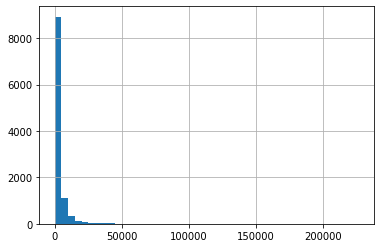

In [49]:
pedidos.valor_liquido.hist(bins=45)

In [53]:
pedidos_cortados.valor_liquido.mean()

2598.0306592787542

In [54]:
pedidos_cortados.valor_liquido.median()

1512.1001

In [55]:
pedidos_cortados.valor_liquido.std()

3113.1753485696095